In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['enrollee_id' 'city' 'city_development_index' 'gender'
 'relevent_experience' 'enrolled_university' 'education_level'
 'major_discipline' 'experience' 'company_size' 'company_type'
 'last_new_job' 'training_hours' 'target']


In [4]:
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [5]:
test_df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
15016,11308,city_46,0.762,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,>4,68
15017,14612,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,4,1000-4999,Pvt Ltd,1,320
15018,33346,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,NaN,9,1000-4999,Pvt Ltd,4,13
15019,14506,city_64,0.666,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,38
15020,32641,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,NaN,3,NaN,NaN,NaN,100


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    14261 non-null object
relevent_experience       18359 non-null object
enrolled_university       18017 non-null object
education_level           17902 non-null object
major_discipline          15521 non-null object
experience                18300 non-null object
company_size              13580 non-null object
company_type              13320 non-null object
last_new_job              17992 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
enrollee

In [7]:
train_df.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
train_df.describe(include=['O'])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,18359,14261,18359,18017,17902,15521,18300,13580,13320,17992
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4358,12884,13596,13659,10769,13738,3437,3120,10051,7567


In [9]:
train_df[['city', 'target']].groupby(['city'], as_index=False).mean().sort_values(by='target', ascending=False)

,city,target
32,city_139,0.750000
73,city_33,0.538462
54,city_171,0.500000
84,city_48,0.333333
39,city_145,0.297297
86,city_53,0.296296
88,city_55,0.285714
40,city_146,0.285714
107,city_79,0.285714
80,city_43,0.285714


In [10]:
for dataset in combine:
    dataset['city'] = dataset['city'].str[5:].astype(int)

In [11]:
x = train_df[['city', 'target']].groupby(['city'], as_index=False).mean().sort_values(by='target')
a = {}
for i, j in zip(x['city'], x['target']):
    if j == 0.0:
        a[i] = 0
    elif (j > 0.0)  and  (j <= 0.05):
        a[i] = 1
    elif (j > 0.05) and  (j <= 0.1):
        a[i] = 2
    elif (j > 0.1)  and  (j <= 0.2):
        a[i] = 3
    elif (j > 0.2)  and  (j <= 0.3):
        a[i] = 4
    elif (j > 0.3)  and  (j <= 0.4):
        a[i] = 5
    elif (j > 0.4)  and  (j <= 0.6):
        a[i] = 6
    elif (j > 0.6):
        a[i] = 7
for dataset in combine:
    dataset['city'] = dataset['city'].map(a).astype(int)
train_df[['city', 'target']].groupby(['city'], as_index=False).mean().sort_values(by='target', ascending=False)

,city,target
7,7,0.750000
6,6,0.533333
5,5,0.333333
4,4,0.263923
3,3,0.131204
2,2,0.085426
1,1,0.036585
0,0,0.000000


In [12]:
train_df[['gender', 'target']].groupby(['gender'], as_index=False).mean().sort_values(by='target', ascending=False)

,gender,target
2,Other,0.153439
0,Female,0.150673
1,Male,0.122477


In [13]:
for dataset in combine:
    dataset['gender'] = dataset['gender'].map( {None: 3, 'Other': 2, 'Female': 1, 'Male': 0} ).astype(int)
train_df[['gender', 'target']].groupby(['gender'], as_index=False).mean().sort_values(by='target', ascending=False)

,gender,target
3,3,0.155930
2,2,0.153439
1,1,0.150673
0,0,0.122477


In [14]:
for dataset in combine:
    dataset['gender'] = dataset['gender'].map( {3: 2, 2: 1, 1: 1, 0: 0} ).astype(int)
train_df[['gender', 'target']].groupby(['gender'], as_index=False).mean().sort_values(by='target', ascending=False)

,gender,target
1,1,0.154703
0,0,0.122477


In [15]:
train_df[['relevent_experience', 'target']].groupby(['relevent_experience'], as_index=False).mean().sort_values(by='target', ascending=False)

,relevent_experience,target
1,No relevent experience,0.17447
0,Has relevent experience,0.11724


In [16]:
for dataset in combine:
    dataset['relevent_experience'] = dataset['relevent_experience'].map( {None: 2, 'No relevent experience': 1, 'Has relevent experience': 0} ).astype(int)
train_df[['relevent_experience', 'target']].groupby(['relevent_experience'], as_index=False).mean().sort_values(by='target', ascending=False)

,relevent_experience,target
1,1,0.17447
0,0,0.11724


In [17]:
train_df[['enrolled_university', 'target']].groupby(['enrolled_university'], as_index=False).mean().sort_values(by='target', ascending=False)

,enrolled_university,target
0,Full time course,0.190461
1,Part time course,0.148591
2,no_enrollment,0.116260


In [18]:
for dataset in combine:
    dataset['enrolled_university'] = dataset['enrolled_university'].map( {None: 3, 'Full time course': 2, 'Part time course': 1, 'no_enrollment': 0} ).astype(int)
train_df[['enrolled_university', 'target']].groupby(['enrolled_university'], as_index=False).mean().sort_values(by='target', ascending=False)

,enrolled_university,target
2,2,0.190461
3,3,0.163743
1,1,0.148591
0,0,0.116260


In [19]:
train_df[['education_level', 'target']].groupby(['education_level'], as_index=False).mean().sort_values(by='target', ascending=False)

,education_level,target
0,Graduate,0.142260
2,Masters,0.118777
1,High School,0.118602
3,Phd,0.115468
4,Primary School,0.077399


In [20]:
for dataset in combine:
    dataset['education_level'] = dataset['education_level'].map( {None: 3, 'Graduate': 2, 'Masters': 1, 'High School': 1, 'Phd': 1, 'Primary School': 0} ).astype(int)
train_df[['education_level', 'target']].groupby(['education_level'], as_index=False).mean().sort_values(by='target', ascending=False)

,education_level,target
2,2,0.142260
3,3,0.133479
1,1,0.118502
0,0,0.077399


In [21]:
train_df[['major_discipline', 'target']].groupby(['major_discipline'], as_index=False).mean().sort_values(by='target', ascending=False)

,major_discipline,target
5,STEM,0.136628
2,Humanities,0.135174
1,Business Degree,0.127036
4,Other,0.107872
0,Arts,0.104603
3,No Major,0.097087


In [22]:
for dataset in combine:
    dataset['major_discipline'] = dataset['major_discipline'].map( {None: 4, 'STEM': 3, 'Humanities': 3, 'Business Degree': 2, 'Other': 1, 'Arts': 1, 'No Major': 0} ).astype(int)
train_df[['major_discipline', 'target']].groupby(['major_discipline'], as_index=False).mean().sort_values(by='target', ascending=False)

,major_discipline,target
3,3,0.136559
2,2,0.127036
4,4,0.117689
1,1,0.106529
0,0,0.097087


In [23]:
train_df[['experience', 'target']].groupby(['experience'], as_index=False).mean().sort_values(by='target', ascending=False)

,experience,target
20,<1,0.242788
0,1,0.238938
11,2,0.172379
14,4,0.168800
13,3,0.164797
17,7,0.146316
15,5,0.140565
16,6,0.136000
5,14,0.124585
2,11,0.124438


In [26]:
x = train_df[['experience', 'target']].groupby(['experience'], as_index=False).mean().sort_values(by='target')
a = {None: 5}
for i, j in zip(x['experience'], x['target']):
    if (j > 0.0)  and  (j <= 0.125):
        a[i] = 1
    elif (j > 0.125) and  (j <= 0.15):
        a[i] = 2
    elif (j > 0.15)  and  (j <= 0.175):
        a[i] = 3
    elif (j > 0.175):
        a[i] = 4
for dataset in combine:
    dataset['experience'] = dataset['experience'].map(a).astype(int)
train_df[['experience', 'target']].groupby(['experience'], as_index=False).mean().sort_values(by='target', ascending=False)

,experience,target
3,4,0.240783
4,5,0.203390
2,3,0.168480
1,2,0.140662
0,1,0.108481


In [27]:
train_df[['company_size', 'target']].groupby(['company_size'], as_index=False).mean().sort_values(by='target', ascending=False)

,company_size,target
0,10/49,0.134379
6,5000-9999,0.125212
3,10000+,0.120841
5,500-999,0.116408
2,1000-4999,0.109364
7,<10,0.107353
1,100-500,0.103781
4,50-99,0.100321


In [30]:
x = train_df[['company_size', 'target']].groupby(['company_size'], as_index=False).mean().sort_values(by='target')
a = {None: 5}
for i, j in zip(x['company_size'], x['target']):
    if (j > 0.10)  and  (j <= 0.11):
        a[i] = 0
    elif (j > 0.11) and  (j <= 0.12):
        a[i] = 1
    elif (j > 0.12)  and  (j <= 0.125):
        a[i] = 2
    elif (j > 0.125)  and  (j <= 0.130):
        a[i] = 3
    elif (j > 0.130):
        a[i] = 4
for dataset in combine:
    dataset['company_size'] = dataset['company_size'].map(a).astype(int)
train_df[['company_size', 'target']].groupby(['company_size'], as_index=False).mean().sort_values(by='target', ascending=False)

,company_size,target
5,5,0.190416
4,4,0.134379
3,3,0.125212
2,2,0.120841
1,1,0.116408
0,0,0.103999


In [31]:
train_df[['company_type', 'target']].groupby(['company_type'], as_index=False).mean().sort_values(by='target', ascending=False)

,company_type,target
3,Other,0.159664
4,Public Sector,0.152610
2,NGO,0.129213
0,Early Stage Startup,0.127148
5,Pvt Ltd,0.109143
1,Funded Startup,0.092486


In [32]:
for dataset in combine:
    dataset['company_type'] = dataset['company_type'].map( {None: 4, 'Other': 3, 'Public Sector': 3, 'NGO': 2, 'Early Stage Startup': 2, 'Pvt Ltd': 1, 'Funded Startup': 0} ).astype(int)
train_df[['company_type', 'target']].groupby(['company_type'], as_index=False).mean().sort_values(by='target', ascending=False)

,company_type,target
4,4,0.182179
3,3,0.153363
2,2,0.128136
1,1,0.109143
0,0,0.092486


In [33]:
train_df[['last_new_job', 'target']].groupby(['last_new_job'], as_index=False).mean().sort_values(by='target', ascending=False)

,last_new_job,target
5,never,0.141812
3,4,0.141618
1,2,0.137213
0,1,0.134532
2,3,0.126582
4,>4,0.108116


In [36]:
x = train_df[['last_new_job', 'target']].groupby(['last_new_job'], as_index=False).mean().sort_values(by='target')
a = {None: 4}
for i, j in zip(x['last_new_job'], x['target']):
    if (j > 0.10)  and  (j <= 0.11):
        a[i] = 0
    elif (j > 0.12)  and  (j <= 0.13):
        a[i] = 1
    elif (j > 0.13)  and  (j <= 0.14):
        a[i] = 2
    elif (j > 0.14):
        a[i] = 3
for dataset in combine:
    dataset['last_new_job'] = dataset['last_new_job'].map(a).astype(int)
train_df[['last_new_job', 'target']].groupby(['last_new_job'], as_index=False).mean().sort_values(by='target', ascending=False)

,last_new_job,target
4,4,0.190736
3,3,0.141749
2,2,0.135262
1,1,0.126582
0,0,0.108116


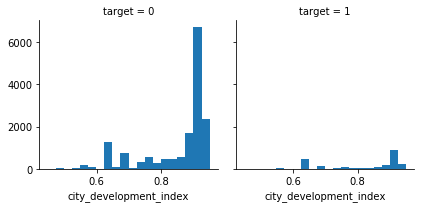

In [20]:
g = sns.FacetGrid(train_df, col='target')
g.map(plt.hist, 'city_development_index', bins=20)

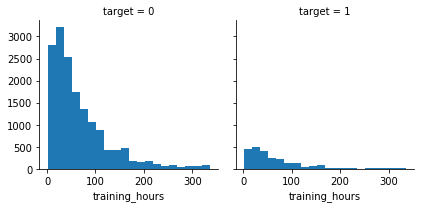

In [21]:
g = sns.FacetGrid(train_df, col='target')
g.map(plt.hist, 'training_hours', bins=20)

In [37]:
train_df = train_df.drop(['enrollee_id', 'training_hours', 'city_development_index'], axis=1)
test_df = test_df.drop(['training_hours', 'city_development_index'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((18359, 11), (15021, 11))

In [38]:
test_df.head()

,enrollee_id,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,16548,6,1,1,2,2,3,4,0,3,4
1,12036,2,0,1,0,2,3,1,0,1,2
2,11061,3,0,1,2,2,3,3,5,4,2
3,5032,2,0,1,0,1,3,1,0,1,2
4,17599,1,0,0,0,2,3,2,0,1,2


In [39]:
train_df.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
0,3,0,0,0,2,3,3,0,1,2,0
1,2,0,0,0,2,3,1,0,0,2,0
2,2,1,0,0,2,3,2,0,3,2,0
3,3,0,0,0,2,3,1,0,1,2,0
4,3,1,1,0,1,3,1,5,4,2,1


In [40]:
X_train = train_df.drop("target", axis=1)
Y_train = train_df["target"]
X_test  = test_df.drop("enrollee_id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((18359, 10), (18359,), (15021, 10))

In [41]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

86.83

In [42]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
0,gender,0.582641
6,company_size,0.113603
4,major_discipline,0.105250
8,last_new_job,0.096180
2,enrolled_university,0.095695
3,education_level,0.093313
1,relevent_experience,0.082846
7,company_type,0.067018
9,target,-0.057030
5,experience,-0.087319


In [43]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

86.81

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.16

In [45]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

82.79

In [46]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/run/media/k/7E8ADDFC8ADDB13F/Projects/Competitions/venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


86.79

In [47]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

86.8

In [48]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/run/media/k/7E8ADDFC8ADDB13F/Projects/Competitions/venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


80.92

In [52]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

90.66

In [56]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

90.66

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,90.66
8,Decision Tree,90.66
1,KNN,87.16
2,Logistic Regression,86.83
0,Support Vector Machines,86.81
7,Linear SVC,86.80
5,Perceptron,86.79
4,Naive Bayes,82.79
6,Stochastic Gradient Decent,80.92


In [57]:
submission = pd.DataFrame({
        "enrollee_id": test_df["enrollee_id"],
        "target": Y_pred
    })

In [58]:
submission.to_csv('sub2.csv', sep=',', index=False)